In [12]:
# Team 1 LendingClub primary notebook
# import dependencies
import pandas as pd
import numpy as np # needed for replace nan code below
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# pull in all csvs and merge them into a single dataframe
bigdf = pd.concat([pd.read_csv(f, low_memory=False, usecols=['loan_amnt','term','int_rate','installment','emp_length','home_ownership','annual_inc','issue_d','loan_status','pymnt_plan','purpose','title','addr_state','dti','delinq_2yrs','mths_since_last_delinq','open_acc','pub_rec','total_rec_late_fee','recoveries','collection_recovery_fee','mths_since_last_major_derog','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','pct_tl_nvr_dlq','pub_rec_bankruptcies','grade','tax_liens'
]) for f in
                    glob.glob('data/LoanStats*.csv')], ignore_index=True)

bigdf.dropna(subset=['term', 'issue_d'], inplace=True)

bigdf['mths_since_recent_bc']=bigdf['mths_since_recent_bc'].replace(np.nan, 0)
bigdf['mths_since_recent_bc_dlq']=bigdf['mths_since_recent_bc_dlq'].replace(np.nan, 0)
bigdf['mths_since_recent_inq']=bigdf['mths_since_recent_inq'].replace(np.nan, 0)
bigdf['emp_length']=bigdf['emp_length'].replace(np.nan, 0)
bigdf['mths_since_recent_revol_delinq']=bigdf['mths_since_recent_revol_delinq'].replace(np.nan, 0)

bigdf['int_rate'] = bigdf['int_rate'].str.replace("%","")
bigdf['int_rate'] = pd.to_numeric(bigdf['int_rate'], errors='coerce')

bigdf['loan_amnt'] = bigdf['loan_amnt'].div(1000000).round(2)


In [13]:
bigdf=bigdf[bigdf.emp_length!= '10+ years']
bigdf=bigdf[bigdf.emp_length!= 0]
bigdf['emp_length'] = bigdf['emp_length'].str.replace("years","")
bigdf['emp_length'] = bigdf['emp_length'].str.replace("year","")
bigdf['emp_length'] = bigdf['emp_length'].str.replace("<","")

bigdf['emp_length'] = pd.to_numeric(bigdf['emp_length'], errors='coerce')

In [14]:
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Jan-18", 1, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Feb-18", 2, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Mar-18", 3, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Apr-18", 4, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "May-18", 5, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Jun-18", 6, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Jul-18", 7, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Aug-18", 8, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Sep-18", 9, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Oct-18", 10, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Nov-18", 11, bigdf['issue_d'])
bigdf['issue_d'] = np.where(bigdf['issue_d'] == "Dec-18", 12, bigdf['issue_d'])

bigdf['mths_since_recent_bc']=bigdf['mths_since_recent_bc'].replace(np.nan, 0)
bigdf['mths_since_recent_bc_dlq']=bigdf['mths_since_recent_bc_dlq'].replace(np.nan, 0)
bigdf['mths_since_recent_inq']=bigdf['mths_since_recent_inq'].replace(np.nan, 0)
bigdf['emp_length']=bigdf['emp_length'].replace(np.nan, 0)
bigdf['mths_since_recent_revol_delinq']=bigdf['mths_since_recent_revol_delinq'].replace(np.nan, 0)

bigdf.dropna(subset=['term', 'issue_d'], inplace=True)

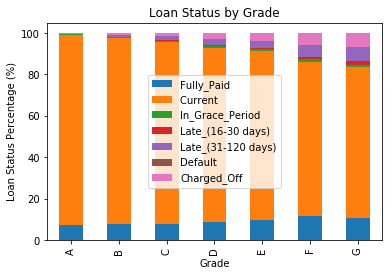

In [61]:
# Start Juhlian Code. Create cross table of DLQ data
Percent_table=pd.crosstab(bigdf.grade, bigdf.loan_status, values=bigdf.loan_amnt, aggfunc='count').round(0)
Percent_table["Default"] = Percent_table["Default"].fillna(0)

# Create grand total and percentage columns
Percent_table['Grand Total'] = Percent_table["Charged Off"] + Percent_table["Current"]+ Percent_table["Default"]+Percent_table["Fully Paid"]+Percent_table["In Grace Period"]+Percent_table["Late (16-30 days)"]+Percent_table["Late (31-120 days)"]
Percent_table["Charged_Off"] = Percent_table["Charged Off"]/Percent_table["Grand Total"]*100
Percent_table["Current "] = Percent_table["Current"]/Percent_table["Grand Total"]*100
Percent_table["Default "] = Percent_table["Default"]/Percent_table["Grand Total"]*100
Percent_table["Fully_Paid"] = Percent_table["Fully Paid"]/Percent_table["Grand Total"]*100
Percent_table["In_Grace_Period"] = Percent_table["In Grace Period"]/Percent_table["Grand Total"]*100
Percent_table["Late_(16-30 days)"] = Percent_table["Late (16-30 days)"]/Percent_table["Grand Total"]*100
Percent_table["Late_(31-120 days)"] = Percent_table["Late (31-120 days)"]/Percent_table["Grand Total"]*100
Percent_table

# Columns for dataframe using only the percentage columns created
col = ["Fully_Paid","Current ","In_Grace_Period","Late_(16-30 days)","Late_(31-120 days)","Default ","Charged_Off"]
Percent_Final = Percent_table[col]

# plot Percent final table
Percent_Final.plot(kind='bar',stacked=True)
plt.legend(loc="center")
plt.title("Loan Status by Grade")
plt.ylabel("Loan Status Percentage (%)")
plt.xlabel("Grade")
plt.savefig("loan Status by Grade 100% Stacked Bar Chart")



In [53]:
# Create Quarter collumn and assign values
bigdf["Quarter"] = ""
bigdf.loc[bigdf['issue_d'] == 12, ("Quarter")] = ("Q4")
bigdf.loc[bigdf['issue_d'] == 11, ("Quarter")] = ("Q4")
bigdf.loc[bigdf['issue_d'] == 10, ("Quarter")] = ("Q4")
bigdf.loc[bigdf['issue_d'] == 9, ("Quarter")] = ("Q3")
bigdf.loc[bigdf['issue_d'] == 8, ("Quarter")] = ("Q3")
bigdf.loc[bigdf['issue_d'] == 7, ("Quarter")] = ("Q3")
bigdf.loc[bigdf['issue_d'] == 6, ("Quarter")] = ("Q2")
bigdf.loc[bigdf['issue_d'] == 5, ("Quarter")] = ("Q2")
bigdf.loc[bigdf['issue_d'] == 4, ("Quarter")] = ("Q2")
bigdf.loc[bigdf['issue_d'] == 3, ("Quarter")] = ("Q1")
bigdf.loc[bigdf['issue_d'] == 2, ("Quarter")] = ("Q1")
bigdf.loc[bigdf['issue_d'] == 1, ("Quarter")] = ("Q1")
bigdf.head()


# count Q1 records and dlq records to create 1st Quarter DLQ Rate
cleanQ1 = bigdf[bigdf["Quarter"]=="Q1"]
Q1_Total = cleanQ1["Quarter"].count()
Q1_Late = cleanQ1[(cleanQ1["loan_status"]== "Late (31-120 days)") | (cleanQ1["loan_status"]== "Late (16-30 days)")]
Q1_DLQ = Q1_Late["loan_status"].count()
Q1_DLQ_Rate = Q1_DLQ/Q1_Total*100

# count Q2 records and dlq records to create 2nd Quarter DLQ Rate
cleanQ2 = bigdf[bigdf["Quarter"]=="Q2"]
Q2_Total = cleanQ2["Quarter"].count()
Q2_Late = cleanQ2[(cleanQ2["loan_status"]== "Late (31-120 days)") | (cleanQ2["loan_status"]== "Late (16-30 days)")]
Q2_DLQ = Q2_Late["loan_status"].count()
Q2_DLQ_Rate = Q2_DLQ/Q2_Total*100

# count Q3 records and dlq records to create 3rd Quarter DLQ Rate
cleanQ3 = bigdf[bigdf["Quarter"]=="Q3"]
Q3_Total = cleanQ3["Quarter"].count()
Q3_Late = cleanQ3[(cleanQ3["loan_status"]== "Late (31-120 days)") | (cleanQ3["loan_status"]== "Late (16-30 days)")]
Q3_DLQ = Q3_Late["loan_status"].count()
Q3_DLQ_Rate = Q3_DLQ/Q3_Total*100

# count Q4 records and dlq records to create 4tj Quarter DLQ Rate
cleanQ4 = bigdf[bigdf["Quarter"]=="Q4"]
Q4_Total = cleanQ4["Quarter"].count()
Q4_Late = cleanQ4[(cleanQ4["loan_status"]== "Late (31-120 days)") | (cleanQ4["loan_status"]== "Late (16-30 days)")]
Q4_DLQ = Q4_Late["loan_status"].count()
Q4_DLQ_Rate = Q4_DLQ/Q4_Total*100


print(Q1_DLQ_Rate)
print(Q2_DLQ_Rate)
print(Q3_DLQ_Rate)
print(Q4_DLQ_Rate)

d = {'QUARTER': ["Q1", "Q2","Q3","Q4"], 'DLQRate': [Q1_DLQ_Rate,Q2_DLQ_Rate,Q3_DLQ_Rate,Q4_DLQ_Rate]}
Clean_df = pd.DataFrame(data=d)



Clean_df

2.3449705085286148
2.2604557518074495
1.4451248482288972
0.6137490049048561


,QUARTER,DLQRate
0,Q1,2.344971
1,Q2,2.260456
2,Q3,1.445125
3,Q4,0.613749


In [55]:
# Import federal reserve data and create dataframe for 2018 data
fed_data = pd.read_csv("data/DRCCLACBS - federal reserve delinquency rates.csv")
fed_data["DATE"] = pd.to_datetime(fed_data["DATE"])
fed_data2018 = fed_data[fed_data["DATE"]>="1/1/2018"]
fed_data2018 = fed_data2018.rename(columns={'DRCCLACBS':'DLQ Rate'})
fed_data2018 = fed_data2018.reset_index()
fed_data2018


,index,DATE,QUARTER,DLQ Rate
0,108,2018-01-01,Q1,2.54
1,109,2018-04-01,Q2,2.48
2,110,2018-07-01,Q3,2.49
3,111,2018-10-01,Q4,2.54


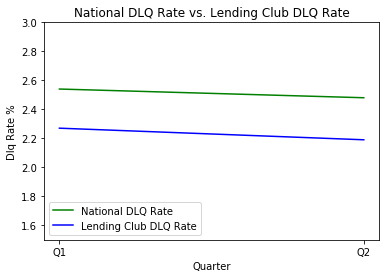

<Figure size 432x288 with 0 Axes>

In [64]:
# Merge Fed Data with clean data
merged_DF = pd.merge(fed_data2018,Clean_df, left_on ="QUARTER",right_on="QUARTER")

# Create a list of the months that we will use as our x axis
Quarters = ["Q1","Q2",]
Fed_Data = [2.54,2.48]
Data = [2.27,2.19]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(Quarters, Fed_Data, color="green", label="National DLQ Rate")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(Quarters, Data, color="blue", label="Lending Club DLQ Rate")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="lower left")

plt.title("National DLQ Rate vs. Lending Club DLQ Rate")
plt.xlabel("Quarter")
plt.ylabel("Dlq Rate %")
plt.ylim(1.5,3)


plt.xticks(Quarters)
# Print our chart to the screen
plt.show()
plt.savefig("National DLQ Rate vs Lending Club DLQ Rate")
